In [2]:
import sys
import os

import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath("../.."))
from wine_quality import dataset


2025-02-08 09:49:58.283 | INFO     | wine_quality.config:<module>:11 - PROJ_ROOT path is: C:\Users\pc\Documents\AI_Projects\wine\wine_quality


The objective of this EDA is to visualize the patterns in the wine dataset and their interaction with quality. The question to be answered is: what are the components of win that affect its quality.

This part combines the red and white datasets and adds a new feature (is_red) to distinguish the color of the wine. Each numerical feature was standardized to better visualize the data.

In [64]:
# Load datasets
red_raw_df = dataset.load_raw_data("winequality-red.csv", ";")
white_raw_df = dataset.load_raw_data("winequality-white.csv", ";")

# Add 'is_red' column (1 for red, 0 for white)
red_raw_df["is_red"] = 1
white_raw_df["is_red"] = 0

# Combine datasets
combined_df = pd.concat([red_raw_df, white_raw_df], ignore_index=True)

# Separate features and target variable
X = combined_df.drop(columns=["quality", "is_red"])  # Features
y = combined_df[["quality", "is_red"]]  

# Define transformations
numerical_features = X.columns.tolist()

# Preprocessing pipeline for X
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features)  # Standardize numerical data
])

# Create pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Fit and transform the dataset
X_transformed = pipeline.fit_transform(X)

# Convert X_transformed into a DataFrame with proper column names
num_cols = [col for col in numerical_features]
X_transformed_df = pd.DataFrame(X_transformed, columns=num_cols)

# Combine transformed features with encoded target
final_df = pd.concat([X_transformed_df, y], axis=1)

display(combined_df)
display(final_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,1
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,5,1
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,5,1
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,6,1
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,6,0
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,5,0
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,6,0
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,7,0


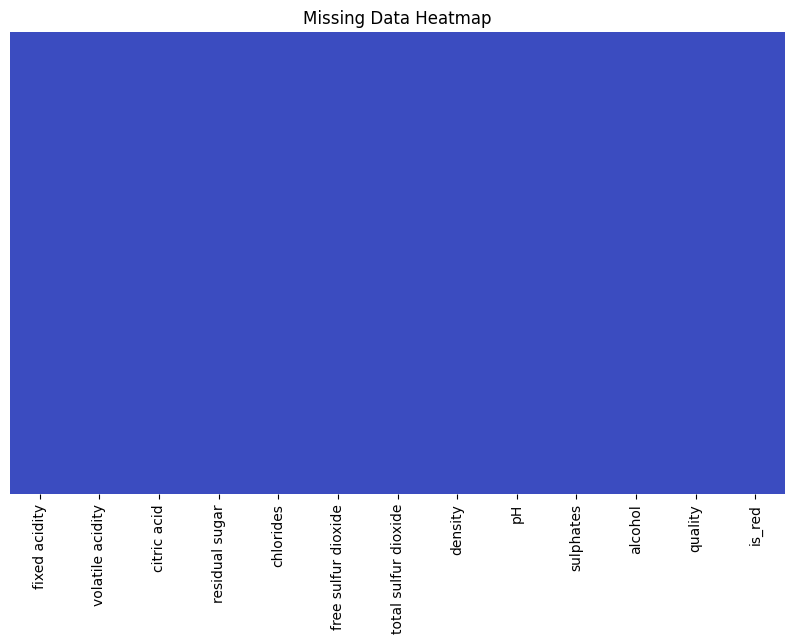

In [47]:
# Check for missing data
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.isnull(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

There is no missing data in the dataset.

## Correlation Matrix

This step visualizes how the different features correlate with quality and with other features. This gives insight on what aspect of the wine influences quality.

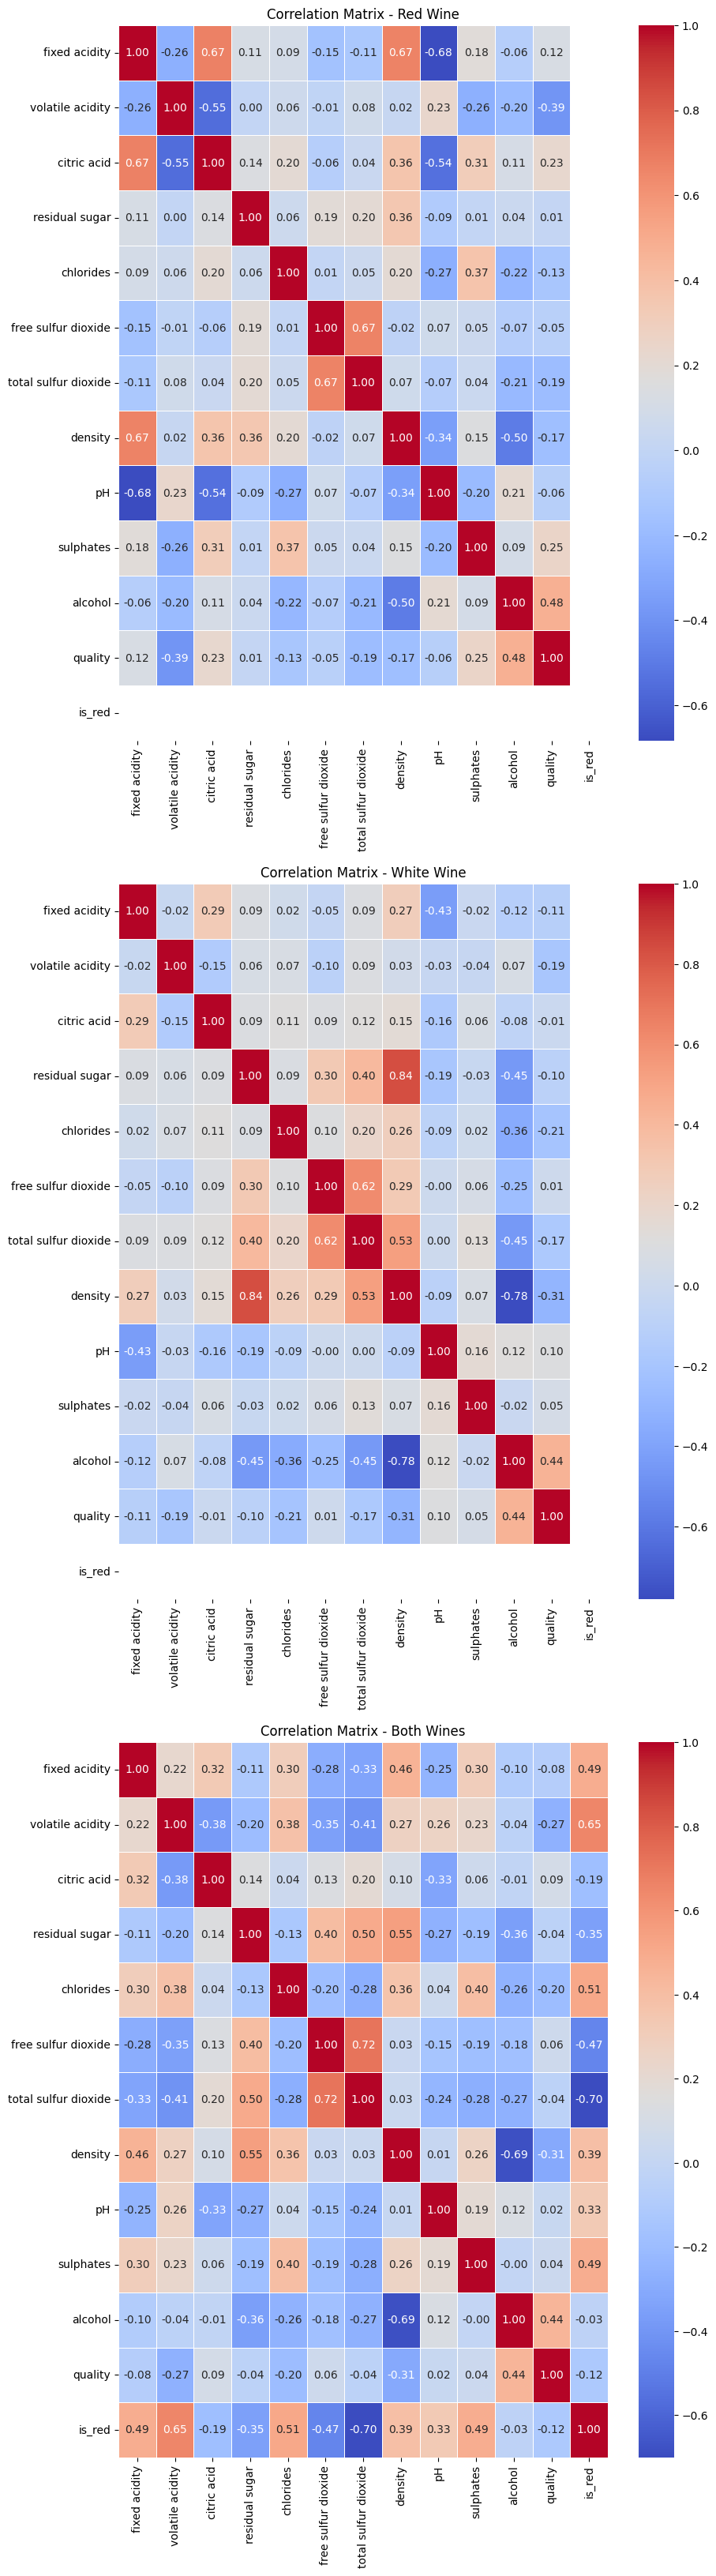

In [58]:
# Separate red and white wines
red_df = final_df[final_df["is_red"] == 1]
white_df = final_df[final_df["is_red"] == 0]

# Compute correlation matrices
red_corr_matrix = red_df.corr()
white_corr_matrix = white_df.corr()
final_corr_matrix = final_df.corr()

# Create subplots
fig, axes = plt.subplots(3,1, figsize=(10, 40))

# Red Wine Heatmap
sns.heatmap(red_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[0])
axes[0].set_title("Correlation Matrix - Red Wine")

sns.heatmap(white_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Matrix - White Wine")

sns.heatmap(final_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[2])
axes[2].set_title("Correlation Matrix - Both Wines")

# Show plots
plt.show()

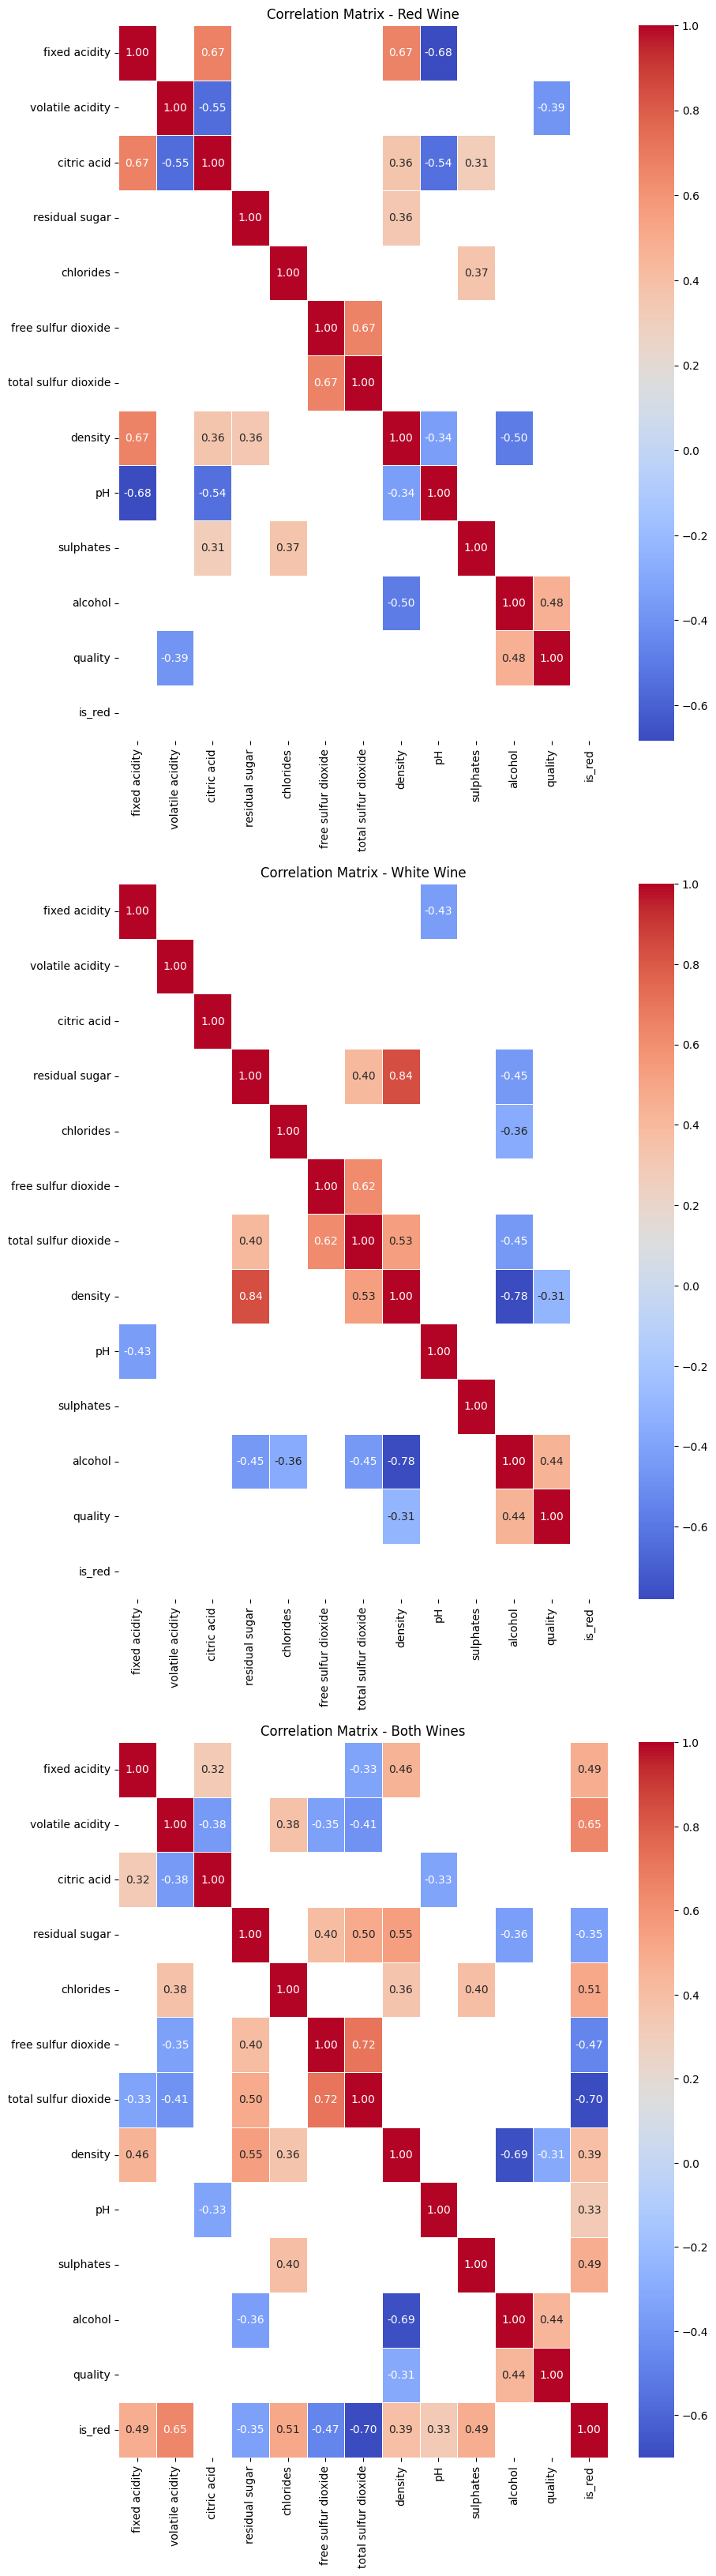

In [61]:
# Set a threshold (e.g., |correlation| > 0.3)
threshold = 0.3

# Create a mask to hide weak correlations
red_mask = np.abs(red_corr_matrix) < threshold
white_mask = np.abs(white_corr_matrix) < threshold
final_mask = np.abs(final_corr_matrix) < threshold

# Plot heatmap
fig, axes = plt.subplots(3, 1, figsize=(10, 40))

# Red Wine Heatmap
sns.heatmap(
    red_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    ax=axes[0],
    mask=red_mask,
)
axes[0].set_title("Correlation Matrix - Red Wine")

sns.heatmap(
    white_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    ax=axes[1],
    mask=white_mask,
)
axes[1].set_title("Correlation Matrix - White Wine")

sns.heatmap(
    final_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    ax=axes[2],
    mask=final_mask,
)
axes[2].set_title("Correlation Matrix - Both Wines")

# Show plot
plt.show()

## Red wine:
Only two features show a strong corelation with quality (>0.3): alcohol has a strong positive corelation with 0.48 while volatile acidity has a strong negative corelation of -0.39. Other noteworthy features are: citric acid and sulphates with 0.23 and 0.25 corelation value respectively.

There are also a few strong corelation between features. Some of these are total sulfur dioxide and free sulfur dioxide (0.67), fixed acidity and pH (0.68), fixed acidity and density (0.67), fixed acidity and citric acid (-0.67), and alcohol and density (-0.50).These pairs however don't have a strong enough corelation to merit removal.

## White wine:
Similar to the red wine, alcohol maintains a strong corelation with a score of 0.44. In addition to this, density has a negative correlation with -0.31.

## For both wines 
Alcohol and density maintains the strongest correlation to quality.

The next graphs purpose is to show the different distributions for each feature. Most are following normal distributions with some skewing to the left. Blue represents the distributions of the white wine, while red represents the distributions of the red wine. Distributions may explain the behavior of some models down the line.

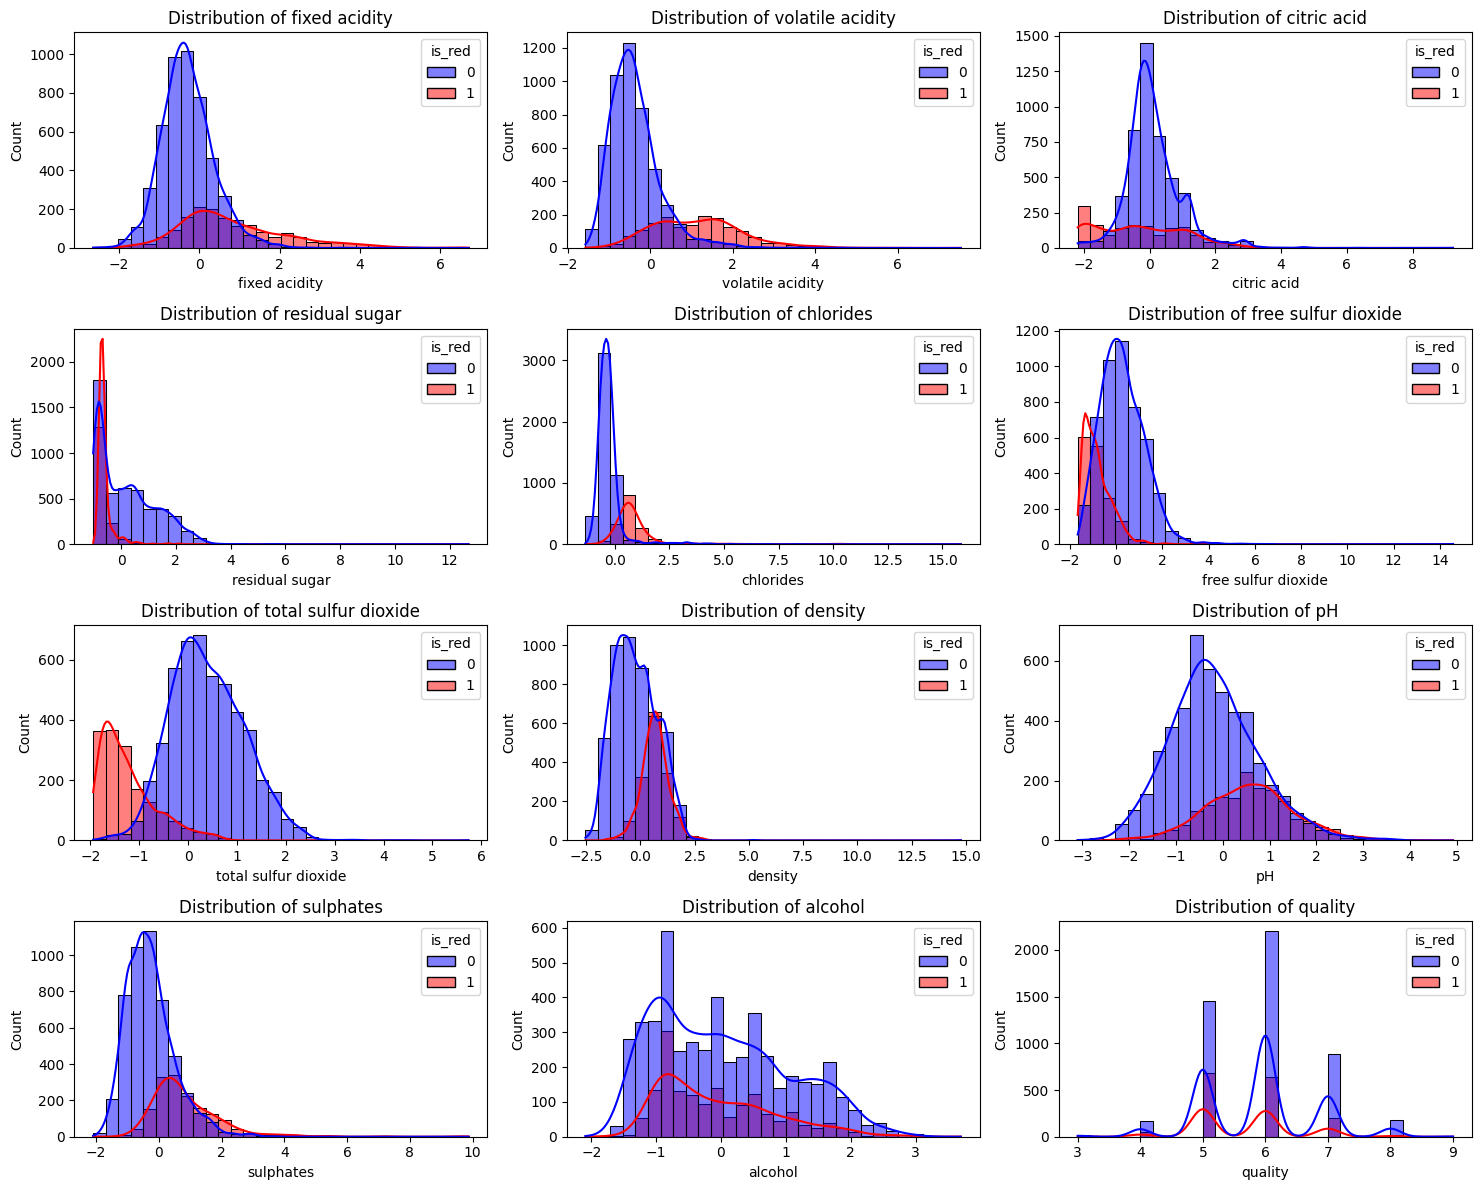

In [65]:
features = final_df.columns.drop("is_red")  # Exclude 'is_red' from numerical features

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(data=final_df, x=feature, hue="is_red", kde=True, bins=30, palette=["blue", "red"], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Adjust layout
plt.tight_layout()
plt.show()

## Box and whisker plots
The next graphs displays the boxplot of each feature against their quality value. This graphically shows the distribution of the feature per quality value as well as the amount of outliers per feature.

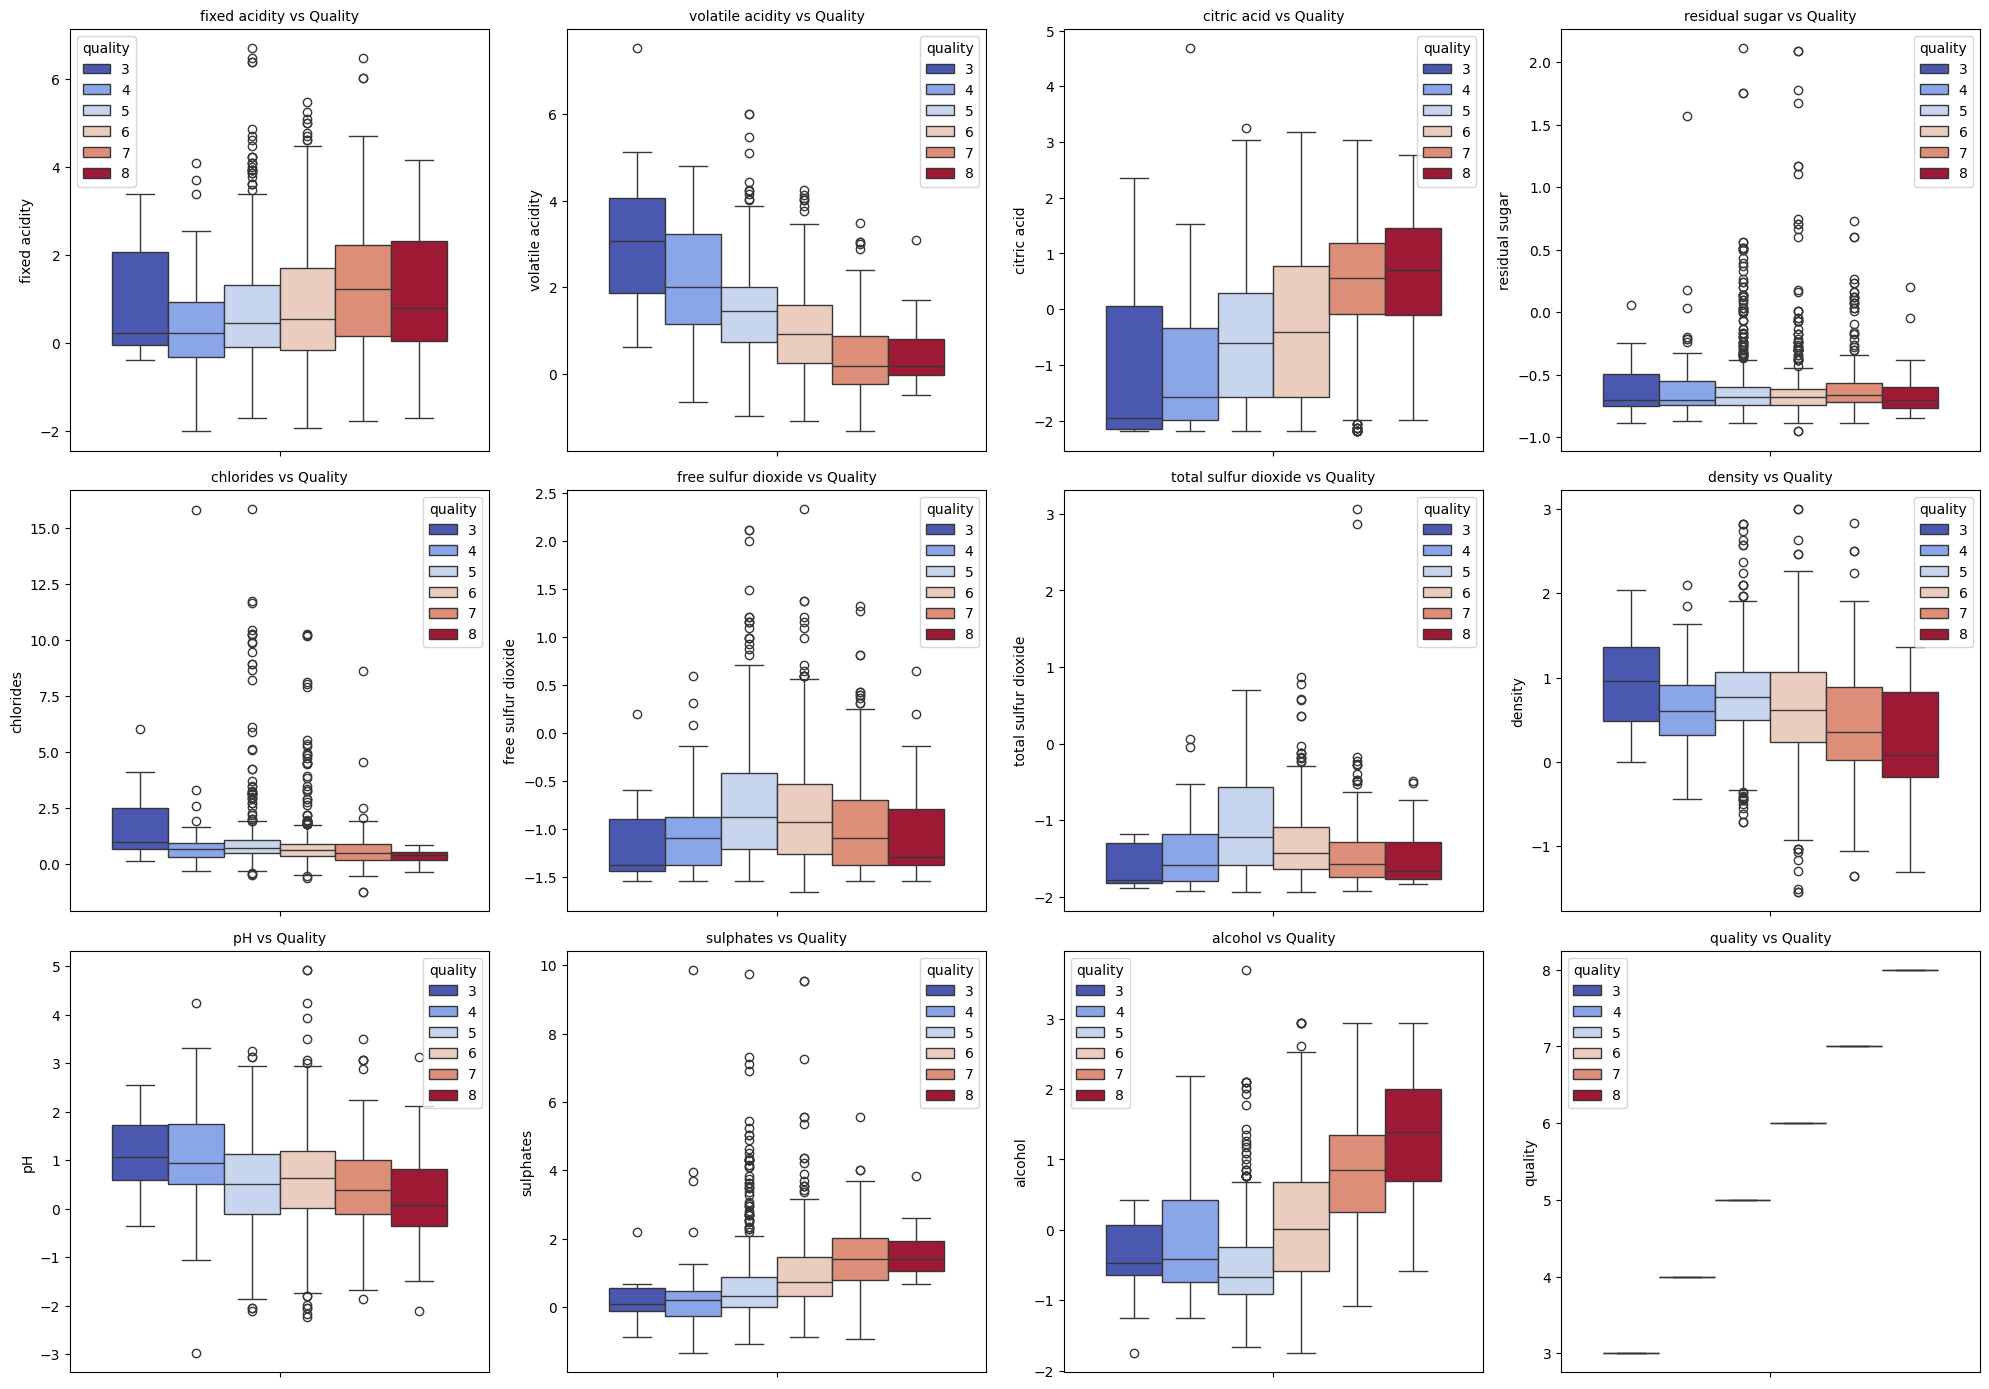

In [70]:
fig, axes = plt.subplots(3, 4, figsize=(20, 14))  # Adjust grid size based on features
axes = axes.flatten()

for i, col in enumerate(red_df.columns[:-1]):  # Exclude 'quality' itself
    sns.boxplot(hue=red_df["quality"], y=red_df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{col} vs Quality", fontsize=10)

plt.tight_layout()
plt.title("Red Wine")
plt.show()

 Higher citric acid tends to have an increase in quality value. Also citric acid generated a small number of outliers. The positive and negative correlations described in the correlation heatmap can be neatly seen here as well.

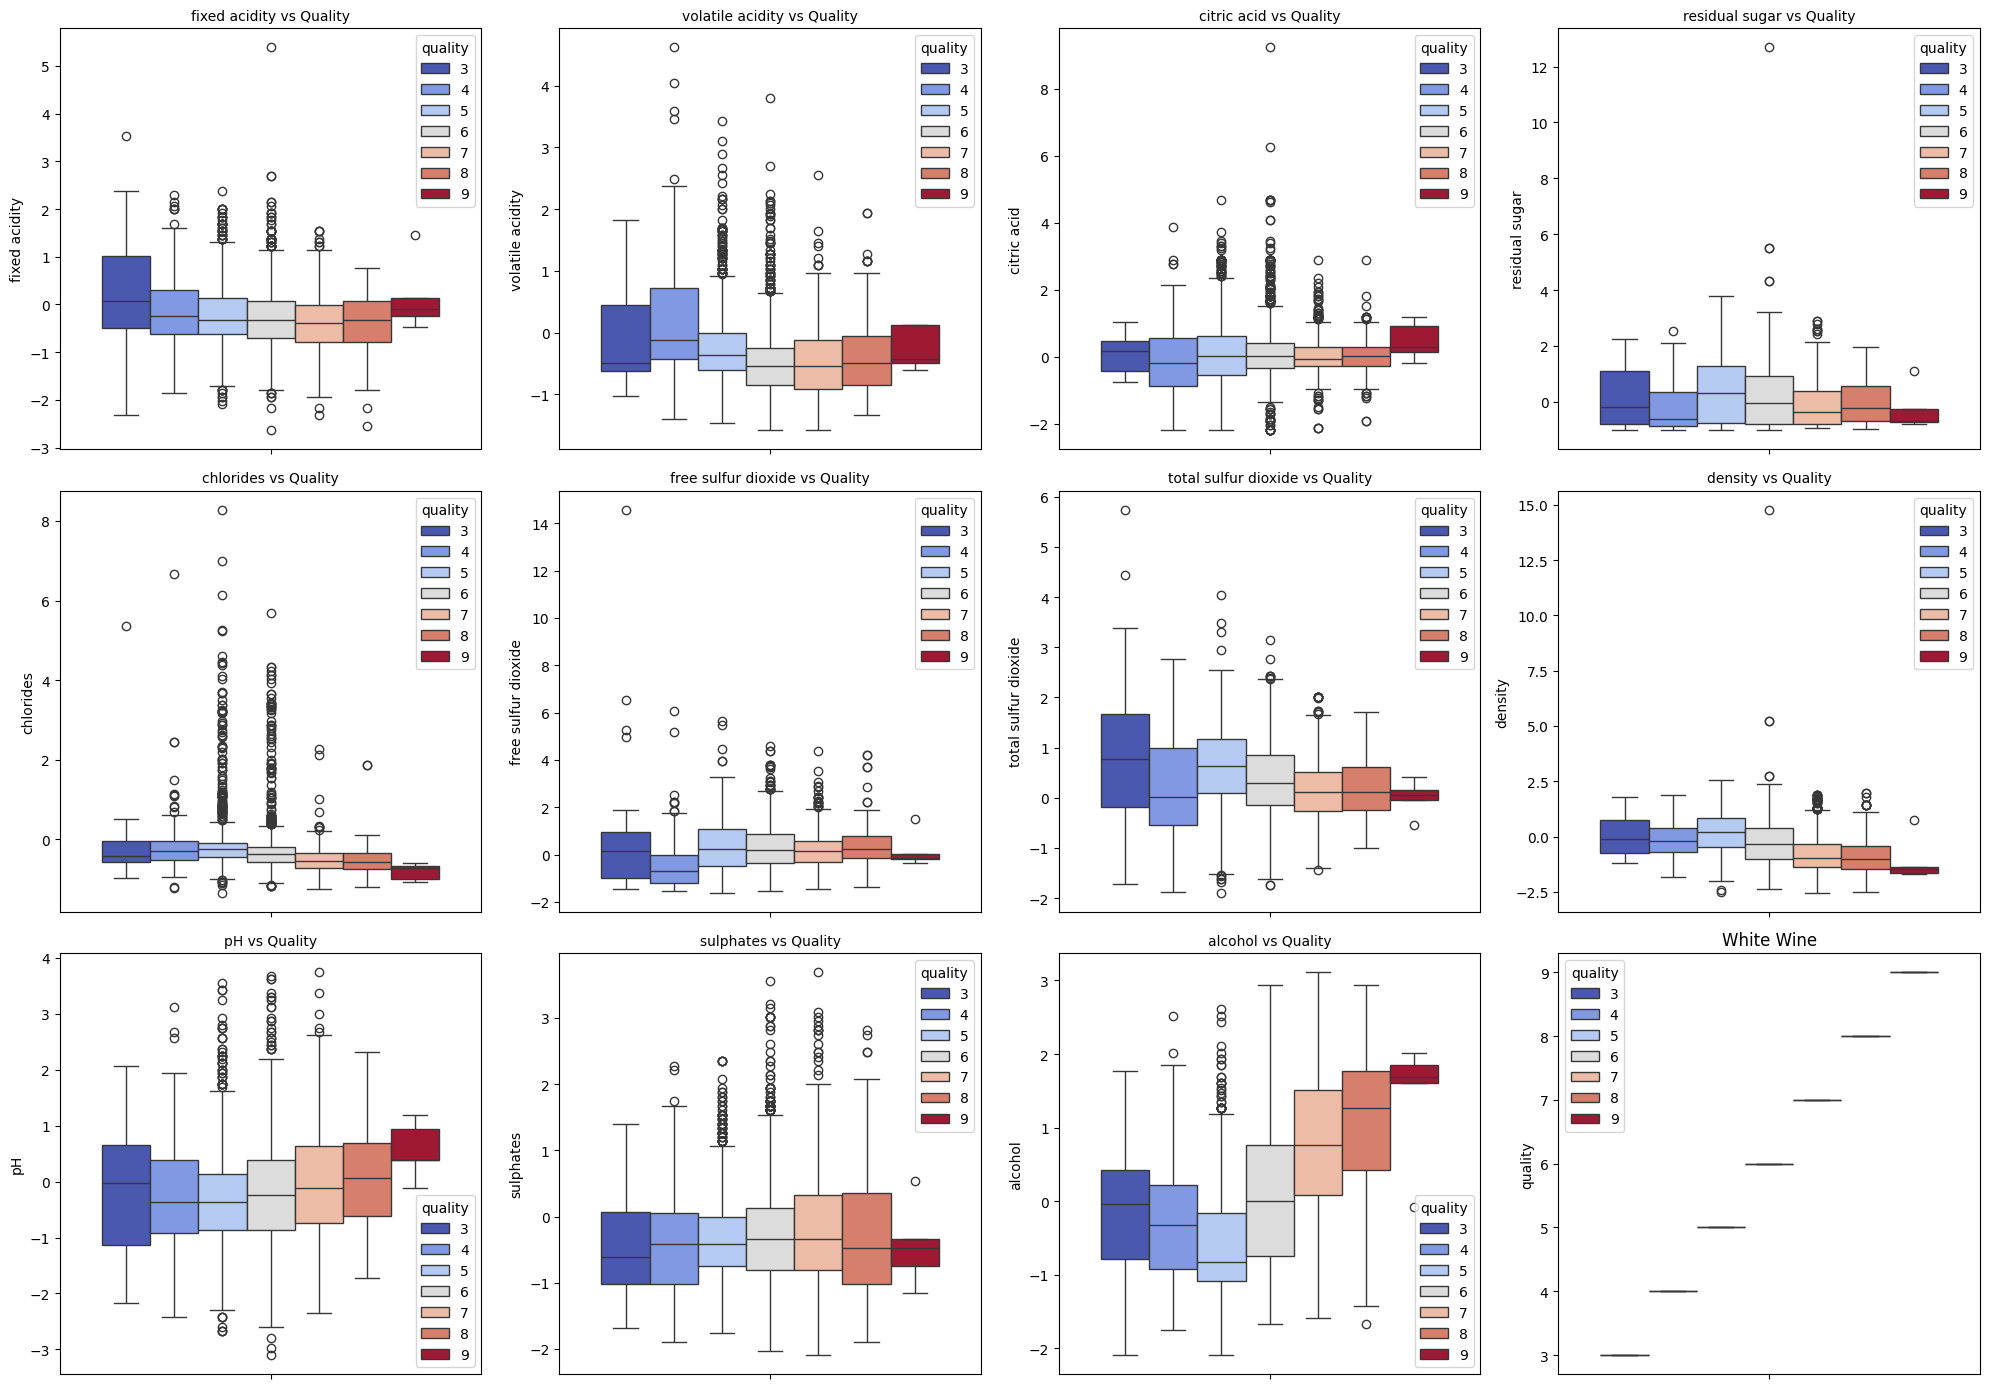

In [72]:
fig, axes = plt.subplots(3, 4, figsize=(20, 14))  # Adjust grid size based on features
axes = axes.flatten()

for i, col in enumerate(white_df.columns[:-1]):  # Exclude 'quality' itself
    sns.boxplot(hue=white_df["quality"], y=white_df[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{col} vs Quality", fontsize=10)

plt.tight_layout()
plt.title("White Wine")
plt.show()